### Importação de Bibliotecas

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
batch_size = 32
num_classes = 10
epochs = 100
lr = 0.001
img_rows, img_cols = 28, 28

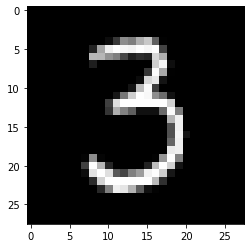

Dimensoes:  (60000, 28, 28, 1)
60000 Exemplos de treino
10000 Exemplos de teste


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

sample_number = 50
image = X_train[sample_number]

fig = plt.figure()
plt.imshow(image, cmap='gray')
plt.show()

X_train = X_train.reshape(60000, img_rows, img_cols, 1)
X_test = X_test.reshape(10000, img_rows, img_cols, 1)

print("Dimensoes: ", X_train.shape)
print(X_train.shape[0], 'Exemplos de treino')
print(X_test.shape[0], 'Exemplos de teste')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Construção do Modelo

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

### Treinamento do Modelo

In [ ]:
opt = keras.optimizers.Adam(learning_rate=lr)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, steps_per_epoch=10, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 31s 195ms/step - loss: 22.9907 - accuracy: 0.2594 - val_loss: 1.6286 - val_accuracy: 0.4708
Epoch 2/100
10/10 [==============================] - 1s 157ms/step - loss: 1.9216 - accuracy: 0.4000 - val_loss: 1.5389 - val_accuracy: 0.5423
Epoch 3/100
10/10 [==============================] - 3s 295ms/step - loss: 1.5276 - accuracy: 0.4625 - val_loss: 1.0311 - val_accuracy: 0.6921
Epoch 4/100
10/10 [==============================] - 1s 155ms/step - loss: 1.1648 - accuracy: 0.5781 - val_loss: 0.6974 - val_accuracy: 0.8195
Epoch 5/100
10/10 [==============================] - 3s 294ms/step - loss: 0.8880 - accuracy: 0.7031 - val_loss: 0.5291 - val_accuracy: 0.8561
Epoch 6/100
10/10 [==============================] - 3s 295ms/step - loss: 0.7072 - accuracy: 0.7500 - val_loss: 0.4393 - val_accuracy: 0.8766
Epoch 7/100
10/10 [==============================] - 1s 155ms/step - loss: 0.7800 - accuracy: 0.7312 - val_loss: 0.3521 - val_accuracy: 0.90

In [ ]:
loss_train, train_acc = model.evaluate(X_train, y_train, verbose=0)
loss_test, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Training accuracy: %.3f, Testing accuracy: %.3f" % (train_acc, test_acc))

Training accuracy: 0.980, Testing accuracy: 0.978


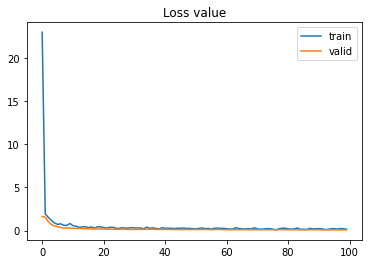

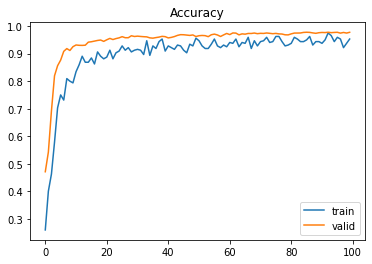

In [ ]:
plt.title("Loss value")
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

plt.title("Accuracy")
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()
plt.show()

----------------- Classification Report -----------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.99      0.95      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000

----------------- Confusion Matrix ----------------------


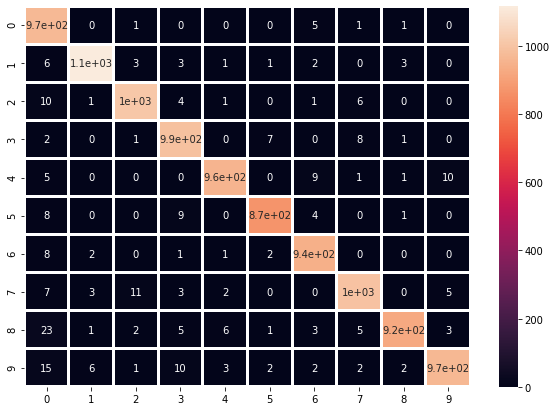

In [ ]:
predictions = model.predict(X_test)
y_pred = (predictions > 0.5)
classification = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("----------------- Classification Report -----------------")
print(classification)
print("----------------- Confusion Matrix ----------------------")
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
df_cm = pd.DataFrame(cm, index=[i for i in range(10)], columns= [i for i in range(10)])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, linewidths=2)